###  Preparing Time Series from Wide-Form Data

Kassandra Doran 


09/26/23

##### Part 1
 1. First, you will prepare the dataset for time series analysis:
    - Load in the Zillow Home Value Index dataframe.
   
    - Filter the 4 largest cities into a new dataframe.
        - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
    - Therefore the 4 largest cities would have rank values of [0,1,2,3]
    - Melt the data to long-form and prepare it for time series analysis.
    - Convert the melted dates into datetime datatype.
    - Make the datetime column the index.
    - Resample the dataframe as monthly frequency, grouped by City.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# import data
df = pd.read_csv('/Users/kass/Desktop/CodingDojo/05-DataViz/Week18/Data/ZHVI.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
#set index to datetime
df = df.set_index('SizeRank')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 0 to 28439
Columns: 280 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(1), object(6)
memory usage: 48.2+ MB


In [4]:
# Seperate 4 largest cities into a sperate dataframe
large_df = df.head(4)
large_df

,RegionID,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
SizeRank,,,,,,,,,,,,,,,,,,,,,
0,6181,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
# melt the data
large_df= pd.melt(large_df,id_vars=[ 'RegionID', 'RegionName', 'RegionType', 'StateName', 'State','Metro','CountyName' ] 
                ,var_name = "Date", value_name = "Price")
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   RegionName  1092 non-null   object 
 2   RegionType  1092 non-null   object 
 3   StateName   1092 non-null   object 
 4   State       1092 non-null   object 
 5   Metro       1092 non-null   object 
 6   CountyName  1092 non-null   object 
 7   Date        1092 non-null   object 
 8   Price       1087 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 76.9+ KB


In [6]:
#Convert the melted dates into datetime datatype.
#Add a datetime column based on the string in the "date" column
large_df['datetime'] = pd.to_datetime(large_df['Date'])
large_df.info()
large_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   RegionType  1092 non-null   object        
 3   StateName   1092 non-null   object        
 4   State       1092 non-null   object        
 5   Metro       1092 non-null   object        
 6   CountyName  1092 non-null   object        
 7   Date        1092 non-null   object        
 8   Price       1087 non-null   float64       
 9   datetime    1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 85.4+ KB


,RegionID,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,datetime
0,6181,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0,2000-01-31
1,12447,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0,2000-01-31
2,39051,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0,2000-01-31


In [7]:
#Add a datetime column based on the string in the "date" column
large_df['datetime'] = pd.to_datetime(large_df['Date'])
large_df.head()


,RegionID,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,datetime
0,6181,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0,2000-01-31
1,12447,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0,2000-01-31
2,39051,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0,2000-01-31
3,17426,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0,2000-01-31
4,6181,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0,2000-02-29


In [8]:
#Make the datetime column the index.
large_df = large_df.set_index('datetime')
large_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   RegionName  1092 non-null   object 
 2   RegionType  1092 non-null   object 
 3   StateName   1092 non-null   object 
 4   State       1092 non-null   object 
 5   Metro       1092 non-null   object 
 6   CountyName  1092 non-null   object 
 7   Date        1092 non-null   object 
 8   Price       1087 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 85.3+ KB


In [9]:
large_MS = large_df.groupby('RegionName').resample("MS").mean()
large_MS

/var/folders/n6/m7hlgmqs36l_cdkqm0vdj6qh0000gn/T/ipykernel_46397/3042155329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  large_MS = large_df.groupby('RegionName').resample("MS").mean()


RegionID     Price
RegionName datetime                      
Chicago    2000-01-01   17426.0  166139.0
           2000-02-01   17426.0  166536.0
           2000-03-01   17426.0  167368.0
           2000-04-01   17426.0  168826.0
           2000-05-01   17426.0  170499.0
...                         ...       ...
New York   2022-05-01    6181.0  768797.0
           2022-06-01    6181.0  773944.0
           2022-07-01    6181.0  777692.0
           2022-08-01    6181.0  779960.0
           2022-09-01    6181.0  781622.0

[1092 rows x 2 columns]

##### Part 2
2. Once you've prepared the dataframe with the time series data for the 4 largest cities:
    - Plot the home values for all 4 cities. (Hint: use unstack)
    - Make sure to add a title and axis labels.
    - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
        - Hint: use the FuncFormatter from matplotlib.
        
        
        
3. Answer the following 2 questions using pandas:

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
    - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
2) How much did the home values change from November 2008 to December 2008 (in dollars)?
    - Hint: you can use .diff() to calculate the change in values

In [14]:
#Unstack cities in df_ts
unstacked = large_MS.unstack(level = 0)
unstacked

RegionID                                   Price            \
RegionName  Chicago  Houston Los Angeles New York   Chicago   Houston   
datetime                                                                
2000-01-01  17426.0  39051.0     12447.0   6181.0  166139.0  109068.0   
2000-02-01  17426.0  39051.0     12447.0   6181.0  166536.0  109079.0   
2000-03-01  17426.0  39051.0     12447.0   6181.0  167368.0  108878.0   
2000-04-01  17426.0  39051.0     12447.0   6181.0  168826.0  108881.0   
2000-05-01  17426.0  39051.0     12447.0   6181.0  170499.0  108834.0   
...             ...      ...         ...      ...       ...       ...   
2022-05-01  17426.0  39051.0     12447.0   6181.0  312487.0  265558.0   
2022-06-01  17426.0  39051.0     12447.0   6181.0  314663.0  268901.0   
2022-07-01  17426.0  39051.0     12447.0   6181.0  315910.0  271059.0   
2022-08-01  17426.0  39051.0     12447.0   6181.0  315587.0  272400.0   
2022-09-01  17426.0  39051.0     12447.0   6181.0  315429.0  272639.0   

                                  
RegionName Los Angeles  New York  
datetime                          
2000-01-01    234181.0  253690.0  
2000-02-01    234401.0  255517.0  
2000-03-01    235513.0  257207.0  
2000-04-01    237589.0  260310.0  
2000-05-01    240113.0  263204.0  
...                ...       ...  
2022-05-01    990391.0  768797.0  
2022-06-01    992337.0  773944.0  
2022-07-01    992630.0  777692.0  
2022-08-01    978196.0  779960.0  
2022-09-01    966595.0  781622.0  

[273 rows x 8 columns]

In [15]:
#Function for string formatter
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

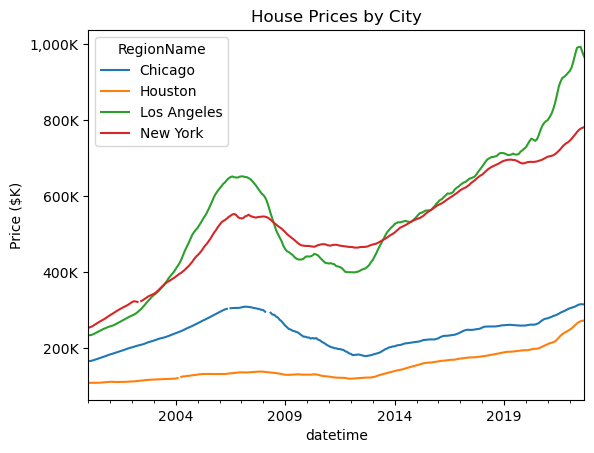

In [16]:
#Plot the data
ax = unstacked['Price'].plot()
ax.set(title = 'House Prices by City', ylabel = 'Price ($K)')
ax.yaxis.set_major_formatter(fmt_thous);

#### Question 1
Which City had the highest Typical Home Value at the end of 2008? Which had the least?

- NY had the highest home value and Huston had the lowest at the end of 2008

In [29]:
#Slice multiindex
max_price = large_MS.loc[pd.IndexSlice[:,'12-2008'],:].idxmax()
max_price


RegionID     (Houston, 2008-12-01 00:00:00)
Price       (New York, 2008-12-01 00:00:00)
dtype: object

In [30]:
#Slice multiindex
min_price = large_MS.loc[pd.IndexSlice[:,'12-2008'],:].idxmin()
min_price

RegionID    (New York, 2008-12-01 00:00:00)
Price        (Houston, 2008-12-01 00:00:00)
dtype: object

##### Question 2
How much did the home values change from November 2008 to December 2008 (in dollars)?

Chicago	changed -$5,753.0

Houston	changed	-$964.0

Los Angeles	changed -$12,611.0

New York changed -$4,458.0

In [32]:
#Find difference
df_diff = large_MS.diff()
df_diff

RegionID   Price
RegionName datetime                    
Chicago    2000-01-01       NaN     NaN
           2000-02-01       0.0   397.0
           2000-03-01       0.0   832.0
           2000-04-01       0.0  1458.0
           2000-05-01       0.0  1673.0
...                         ...     ...
New York   2022-05-01       0.0  6476.0
           2022-06-01       0.0  5147.0
           2022-07-01       0.0  3748.0
           2022-08-01       0.0  2268.0
           2022-09-01       0.0  1662.0

[1092 rows x 2 columns]

In [33]:
#Slice nov to dec and find the difference between them, dropping NAs

ts = df_diff.loc[pd.IndexSlice['11/2008':,'12/2008'],:].copy().dropna()
ts

,,RegionID,Price
RegionName,datetime,,
Chicago,2008-12-01,0.0,-5753.0
Houston,2008-12-01,0.0,-964.0
Los Angeles,2008-12-01,0.0,-12611.0
New York,2008-12-01,0.0,-4458.0
